# Hyperparameter Tuning 

In this task, we will learn how to find the hyperparameters in a neural network setting. We will use MNIST dataset, which is a handwritten digit recognition dataset. More on MNIST: http://yann.lecun.com/exdb/mnist/ 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tensorflow as tf
from keras.datasets import mnist
import pandas as pd
import numpy as np
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense 
from keras.models import Sequential 
from numpy.random import seed


MNIST handwritten digit recognition dataset

if **from keras.utils import to_categorical** does not work, use **from tensorflow.keras.utils import to_categorical**

In [2]:
#Fortunately Keras already have this dataset on its server. Let's load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
from sklearn.model_selection import train_test_split


In [6]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.20, random_state=3037)
# DONOT change the random_state variable

In [7]:
x_train.shape

(48000, 28, 28)

In [8]:
x_valid.shape

(12000, 28, 28)

In [9]:
d = pd.DataFrame()
d["y"] = y_train

In [10]:
# Let's analyze, how the distribution for the class variable looks like:
d.y.value_counts()

1    5381
7    5004
3    4876
2    4797
0    4785
9    4774
6    4743
4    4671
8    4610
5    4359
Name: y, dtype: int64

The images we have are in the 28 \* 28 dimension. For a simple shallow neural network, we donot have to consider the height and width of the images separately. That means, we can simply make a long vector of 28 \* 28 = 784 dimension and work with it. 

In [11]:
# Flattening the images
flattened_image = x_train.shape[1]*x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], flattened_image)
x_valid = x_valid.reshape(x_valid.shape[0], flattened_image)
x_test = x_test.reshape(x_test.shape[0], flattened_image)

In [12]:
x_train.shape

(48000, 784)

In [13]:
x_valid.shape

(12000, 784)

In [14]:
x_test.shape

(10000, 784)

In [15]:
# converting the classes to categorical variable
classes = np.unique(y_train)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [16]:
num_classes = len(classes)
num_classes

10

For the specific loss function we will use "categorical cross entropy", it is important to convert the target class in an one-hot-encoded form

In [17]:
y_train = to_categorical(y_train)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [19]:
# Helper function 1: 
#create the neural network
def create_model(num_layers, num_units, flattened_size, activation_function, class_size):
  '''
  We create a neural network in this function. You can choose the layer size, the units perlayer, activation function,
  and size of the class. This function creates the basic architecture required to handle the tasks.
  '''
  seed(37)
  random.seed(37)
  tf.random.set_seed(37)
  model = Sequential()
  model.add(Dense(units=num_units, activation=activation_function, input_shape=(flattened_size,)))
  for i in range(num_layers-1):
    model.add(Dense(units=num_units, activation=activation_function))
  model.add(Dense(units=num_classes, activation='softmax'))

  return model


In [20]:
def evaluate(FCmodel, Learning_Rate, batch_sz, epochs, add_visualization=True):
  '''
  This function will run and evaluate the neural network. 
  *** Important: DoNOT change the seed values. This will ensure the reproducibility of the experiments.
  '''
  seed(37)
  random.seed(37)
  tf.random.set_seed(37)
  opt = tf.keras.optimizers.SGD(learning_rate=Learning_Rate)
  FCmodel.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  history = FCmodel.fit(x_train, y_train, batch_size=batch_sz, epochs=epochs, 
                        verbose=add_visualization, validation_data=(x_valid, y_valid))
  loss, accuracy  = FCmodel.evaluate(x_valid, y_valid, verbose=False)

  if add_visualization:
    print(f'validation loss: {loss:.4}')
    print(f'validation accuracy: {accuracy:.4}')

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model performance')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()


  return loss, accuracy


Let's check, how our model performs. Run the followung cell and make sure you get the EXACT same values as output. 

Epoch 1/100
188/188 [==============================] - 2s 5ms/step - loss: 2.3016 - accuracy: 0.1125 - val_loss: 2.2961 - val_accuracy: 0.1134
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 2.2937 - accuracy: 0.1166 - val_loss: 2.2904 - val_accuracy: 0.1134
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 2.2857 - accuracy: 0.1291 - val_loss: 2.2797 - val_accuracy: 0.1205
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 2.2671 - accuracy: 0.1864 - val_loss: 2.2490 - val_accuracy: 0.2005
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 2.2058 - accuracy: 0.2234 - val_loss: 2.1411 - val_accuracy: 0.2479
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 2.0349 - accuracy: 0.2330 - val_loss: 1.9296 - val_accuracy: 0.2531
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 1.8570 - accuracy: 0.2750 - val_loss: 1.8101 - val_accuracy: 0.3095

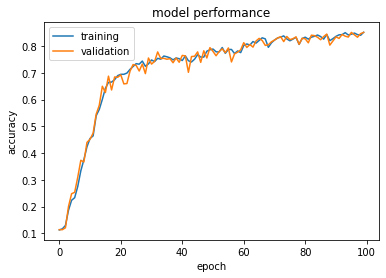

In [21]:
special_model = create_model(num_layers=4, num_units=16, flattened_size=x_test.shape[1], 
                     activation_function='sigmoid', class_size=num_classes)
loss, acc = evaluate(FCmodel=special_model, Learning_Rate=0.1, batch_sz=256, epochs=100)

In [22]:
special_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
Total params: 13,546
Trainable params: 13,546
Non-trainable params: 0
_________________________________________________________________


## Subtask 1: Tune each class of Hyperparameters and observe the performance with a graph

The first one is done for you

In [23]:
# Below are the five classes of hyperparameters
LAYERS = [2, 3, 4]
UNITS = [4, 8, 16, 32, 64, 128, 256]
BATCH = [8, 16, 32, 64, 128]
LEARNING_RATE = [0.1, 0.01, 0.001, 0.0001, 0.00001]
EPOCHS = [10, 20, 30, 40, 100]

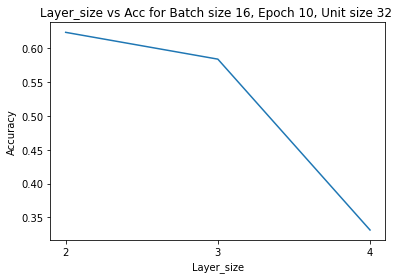

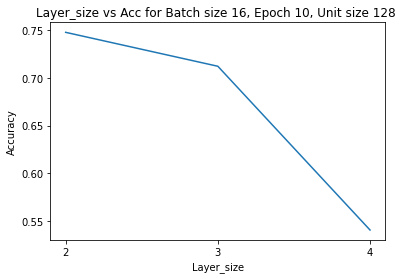

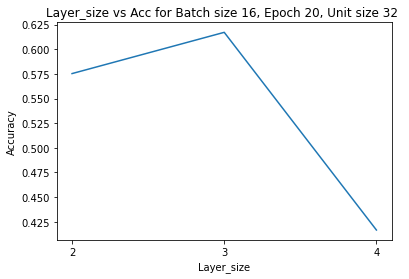

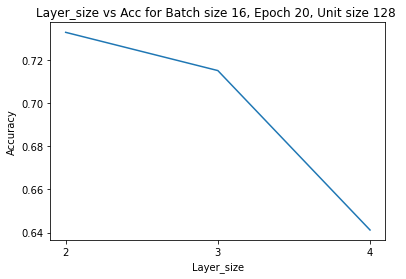

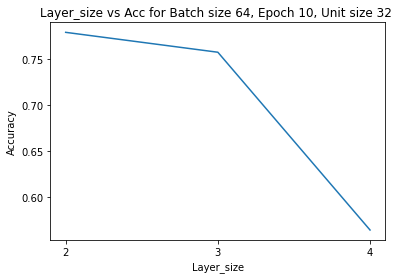

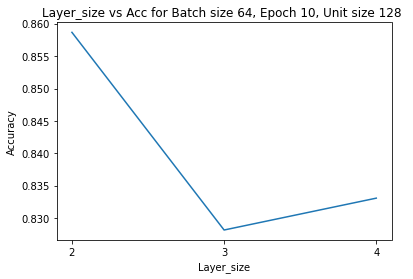

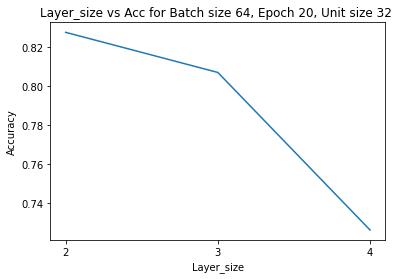

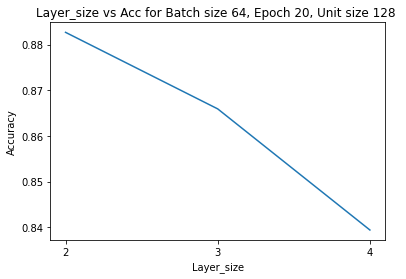

CPU times: user 24min 34s, sys: 1min 56s, total: 26min 30s
Wall time: 23min 12s


In [24]:
# Question 1: create a Layer-vs-accuracy graph for the following setting:
# units = [32, 128], Batch_size = [16, 64], Learning_rate = [0.1], Epochs = [10, 20]
# That means there will be 2*2*1*2 = 8 graphs
%%time
for B in [16, 64]:
  for E in [10,20]:
    for U in [32, 128]:
      ACC = []
      for L in LAYERS:
        special_model = create_model(num_layers=L, num_units=U, flattened_size=x_test.shape[1], 
                            activation_function='sigmoid', class_size=num_classes)
        loss, acc = evaluate(FCmodel=special_model, Learning_Rate=0.1, batch_sz=B, epochs=E, add_visualization=False)
        ACC.append(acc) 

      plt.plot(LAYERS, ACC)
      plt.xticks(LAYERS)
      plt.xlabel("Layer_size")
      plt.ylabel("Accuracy")
      TITLE = "Layer_size vs Acc for Batch size {}, Epoch {}, Unit size {} ".format(B, E, U)
      plt.title(TITLE)
      plt.show()



In [25]:
# Question 2: create a Unit size-vs-accuracy graph for the following setting:
# Layer size = [2], Batch_size = [16, 64], Learning_rate = [0.1], Epochs = [10, 20]
# That means there will be 1*2*1*2 = 4 graphs

## code starts here

In [26]:
# Question 3: create a Batch size-vs-accuracy graph for the following setting:
# Layer size = [2], Unit_size = [16, 32], Learning_rate = [0.1], Epochs = [10, 20]
# That means there will be 1*2*1*2 = 4 graphs

## code starts here

In [27]:
# Question 4: create a Learning rate-vs-accuracy graph for the following setting:
# Layer size = [2], Unit_size = [16, 32], Batch_size = [16], Epochs = [10, 20]
# That means there will be 1*2*1*2 = 4 graphs

## code starts here

In [28]:
# Question 5: create a Epoch size-vs-accuracy graph for the following setting:
# Layer size = [2], Unit_size = [32], Batch_size = [8, 16], Learning_rate = [0.1]
# That means there will be 1*1*2*1 = 2 graphs

## code starts here

## Subtask 2:

Grid search of hyperparameters to find the best set of hyperparameters.

Rank the best set of parameters among the following setting.
* LAYERS = [2, 3, 4]
* UNITS = [16, 64]
* BATCH_SIZE = [8, 32, 128]
* LEARNING_RATE = [0.1, 0.01, 0.001, 0.0001, 0.00001]
* EPOCHS = [10, 20, 30]

Also comment the three best and three worst setting of hyperparameters

In [29]:
def hyperparameter_ranking(LAYERS, UNITS, BATCH_SIZE, LEARNING_RATE, EPOCHS) ->pd.DataFrame:
  '''
  Your code should return a DataFrame where columns will be LAYERS, UNITS, BATCH_SIZE, LEARNING_RATE, EPOCHS and corresponding accuracy.
  The dataframe MUST be sorted in descending order based on the accuracy like the following cell. There will be 270 row
  
  '''



**The code is taking a long time to run**

* PC is crashing
* Collab is closing the session (a bit unlikely)

**Tips to get around**

1. create some (even one will help) helper functions first and combine them. For instance, assume the following function--

```
hyperparameter_helper(Layer_size, UNITS, BATCH_SIZE, LEARNING_RATE, EPOCHS) ->pd.DataFrame:    
# use fixed layer size will result in dataframe of size 90 for each layer size, significantly reducing your experiments. You can use this helper function inside the hyperparameter_ranking
```
2. parallelization: A bit tricky in google colab
3. Using GPU:  Runtime -> Change Runtime Type -> hardware accelerator --> GPU 



In [30]:
##  Your DataFrame table should be of the following form. Please note: the accuracy values are shown here are just for demonstration
#   purposes. The accuracy should be in the descending order

#           | LAYERS | UNITS | BATCH_SIZE | LEARNING_RATE | EPOCHS | Accuracy
#      0        3         16        32          0.1          10         0.71
#      1        4         32        16         0.001         20         0.68
#         ............................................................
#         ............................................................
#         ............................................................
#     269       4         128        16          0.1          10         0.43

## Subtask 3: Advanced Hyperparameter Optimization

In this task, you have to find some advanced hyperparameters:

* Optimizer = [SGD, ADAM, RMSprop, Adagrad] (https://keras.io/api/optimizers/)
* Dropout_Rate = [0, 0.2, 0.5] (https://keras.io/api/layers/regularization_layers/dropout/)
* Kernel_Initializer = [RandomUniform, GlorotNormal, RandomNormal, zero] (https://keras.io/api/layers/initializers/)

**Special Note: You will investigate different settings for these hyperparameters as well. For example, for ADAM, there are beta_1 and beta_2 values. You can assume them to be default value (0.9 and 0.999). For other Optimizers, and kernel intializers, you can assume their default value for this subtask**

Follow the steps below:

**step 1**: Choose the best set of parameters from the subtask2. This will be the first entry from the dataframe table. 

**step 2**: Modify the function *create_model* by creating the new function *create_model_subtask3* that additionally considers the Dropout rate, and Kernel Initializer! For dropout this can be done as follows. 

```
model.add.....................
model.add(Dropout(0))
```

**step 3**: Modify the function *evaluate* to *evaluate_subtask3* to account for the optimizers



In [ ]:
def advanced_hyperparameter_search(OPTIMIZER, DROPOUT_RATE, KERNEL_INITIALIZER)->pd.DataFrame:
  '''
  In the same way as subtask2, create a table with columns for 
  OPTIMIZER, DROPOUT_RATE, KERNEL_INITIALIZER and accuracy. 
  The dataframe MUST be sorted in descending order based on the accuracy like the following cell. There will be 48 rows, 
  For other parameters, use the best one you found from subtask2 function hyperparameter_ranking. 
  '''

## Few Notes:

* Your code should create and also call the function. That means, you must show the output of the function call. For long dataframe tables, you can use 

```
df.head(10) #it will print first 10 rows of the table
df.tail(10) #it will print last 10 rows of the table
```

* Be careful about the Keras model being "retrained" from where you left it in the function. For example, 

```
special_model = create_model(num_layers=4, num_units=16, flattened_size=x_test.shape[1], 
                     activation_function='sigmoid', class_size=num_classes)
loss, acc = evaluate(FCmodel=special_model, Learning_Rate=0.1, batch_sz=256, epochs=100)
```

after these lines, if you write



```
loss, acc = evaluate(FCmodel=special_model, Learning_Rate=0.1, batch_sz=256, epochs=100)
```
you'll probably expect the model to get trained again from **scratch**. But it won't, and the model will get trained from where it left off. So, every time you need to retrain your model or train a new model, you have to write down both the lines to be safe. 





